# Data Science com Python <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Python-logo-notext.svg/1024px-Python-logo-notext.svg.png" width="40" height="40" align="center"/> 

## Parte 08: Gráficos avançados com o pacote seaborn
Utilizando pacotes gráficos como o [```seaborn```](https://seaborn.pydata.org/tutorial.html) temos a possibilidade de gerar gráficos mais avançados de forma simples e rápida. O pacote ```seaborn``` (apelidado de ```sns```) foi contruido em cima do pacote ```matplotlib``` e possui compatibilidade com o pacote ```pandas```. Dentre suas representações gráficas temos:
* Visualização de relacionamento estatístico
* Plotagem de dados categóricos
* Visualização de distribuições de frequência
* Representação de relação linear entre variáveis

Para exemplificar a criação e interpretação de diferentes gráficos presentes no pacote, utilizaremos a base de dados de exemplo contida no próprio pacote ```seaborn``` chamada [```tips```](https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv). Nela, temos registros de mesas de um restaurante com as seguintes informações:
* ```total_bill```: valor total da conta
* ```tip```: corjeta
* ```sex```: sexo
* ```smoker```: fumante (sim ou não)
* ```day```: dia da semana
* ```time```: horário (Almoço ou Jantar)
* ```size```: tamanho da refeição

Para criar o ```DataFrame``` contendo as informações do exemplo ```tips```, utilizamos o comando [```seaborn.load_dataset()```](https://seaborn.pydata.org/generated/seaborn.load_dataset.html), passando o texto "tips" como parâmetro. [Clique aqui](https://github.com/mwaskom/seaborn-data) para acessar a lista completa de exemplos.

In [1]:
import seaborn as sns

df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Gráficos para análise de correlação
O primeiro conjunto de gráficos disponível é definido como [```seaborn.relplot()```](https://seaborn.pydata.org/generated/seaborn.relplot.html). Os três parâmetros obrigatórios para essa função são:
* ```data```: parâmetro que recebe o ```DataFrame```
* ```x```: recebe o nome da coluna que será representada pelo eixo $x$
* ```y```: recebe o nome da coluna que será representada pelo eixo $y$

No exemplo abaixo temos o gráfico gerado para analisar a relação entre o valor total da conta e a corjeta. 

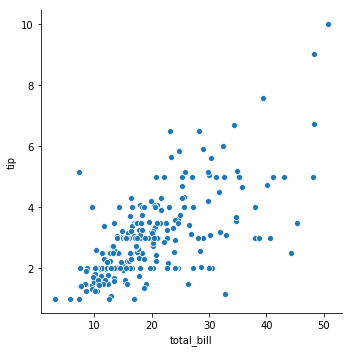

In [2]:
sns.relplot(x='total_bill', y='tip', data=df)

### Escala de cores
Todos os gráficos disponíveis no pacote ```seaborn``` possuem um parâmetro opcional chamado ```hue```. Esse parâmetro recebe o nome da coluna (de preferência categórica) que será representada por uma escala de cores.

No exemplo abaixo temos o mesmo gráfico anterior, diferenciando o sexo do cliente com escala de cor.

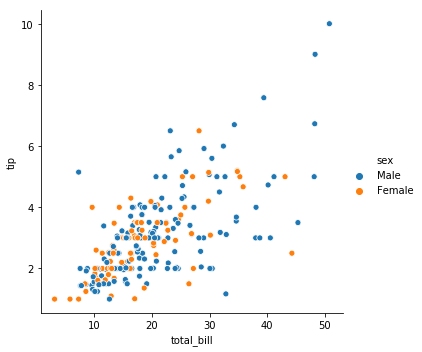

In [3]:
sns.relplot(x='total_bill', y='tip', hue='sex', data=df)

### Escala de tamanho
Outra possiblidade também disponível para todos os gráficos é a representação por escala de tamanho. Para representar uma informação contida em uma coluna com a escala de tamanho, utilizamos o parâmetro ```size```.

No exemplo abaixo temos o gráfico anterior acrescido do parâmetro ```size``` representado o tamanho das refeições.

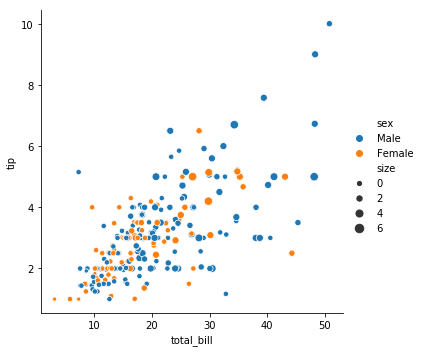

In [4]:
sns.relplot(x='total_bill', y='tip', hue='sex', size='size', data=df)

### Diferenciando categorias com estilo de ponto
Além das escalas de cores e tamanho, temos ainda a possiblidade de diferenciar dados categóricos utilizando diferentes estilos de pontos. Para tanto, definimos o parâmetro ```style```.

No exemplo abaixo, representamos o horário da refeição com a diferenciação de estilos. 

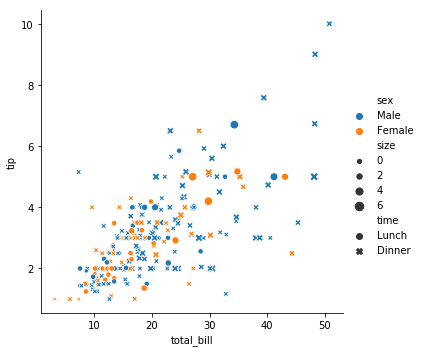

In [5]:
sns.relplot(x='total_bill', y='tip', hue='sex', size='size', style='time', data=df)

### Separação por linhas e colunas
Uma última possibilidade de diferenciação de dados categóricos é através da criação de um gráfico para cada categoria. No pacote ```seaborn``` utilizamos os parâmetro ```row``` e ```col``` para a separação em linhas e colunas, respectivamente.

No exemplo abaixo, separamos em cada coluna o horário e, em cada linha, separamos os fumantes dos não fumantes.

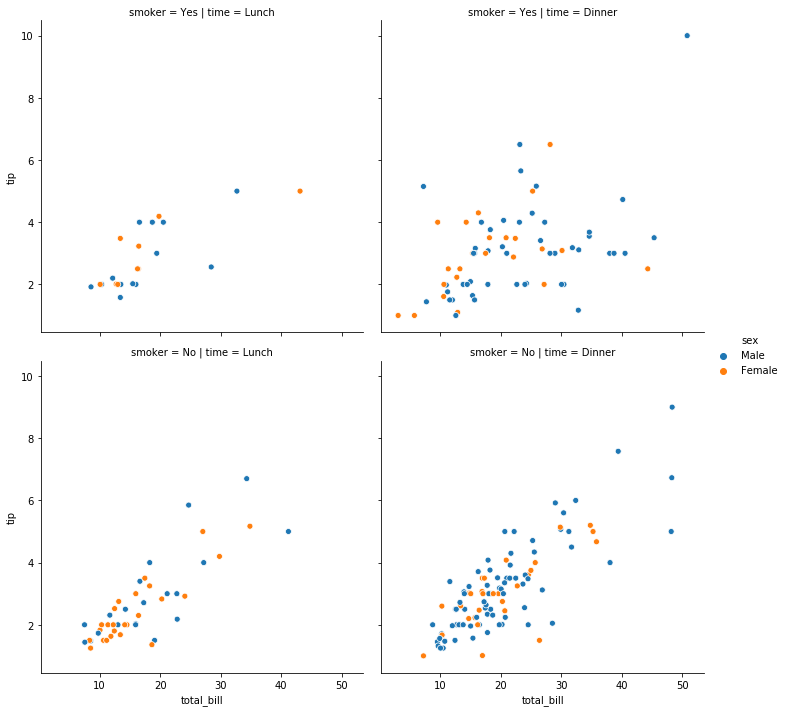

In [6]:
sns.relplot(x='total_bill', y='tip', hue='sex', col='time', row='smoker', data=df)

## Gráficos para análise catogórica
No pacote ```seaborn```, conjunto de gráficos para análise categórica de dados é definido como [```seaborn.catplot()```](https://seaborn.pydata.org/generated/seaborn.catplot.html). Para esse conjunto de gráficos, temos diversas possibilidades de representação. No seu formato padrão, o parâmetro ```kind``` (que define o tipo de gráfico) é definido como "strip".
### Gráfico "strip"
No gráfico "strip", estamos interessados em comparar a distribuição de dados para diferentes categorias. Dessa forma, faz sentido que façamos a definição do parâmetro ```x``` como sendo uma coluna categórica e ```y``` como sendo uma coluna numérica.

No exemplo abaixo, criamos um gráfico "strip" comparando o valor total da conta (```total_bill```) para os dias da semana.

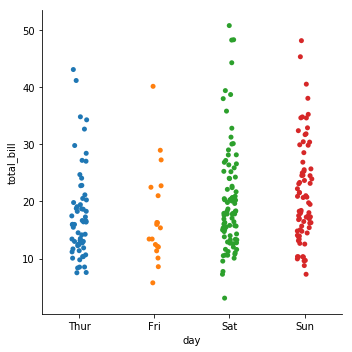

In [7]:
sns.catplot(x='day', y='total_bill', data=df)

Observe que os pontos não estão alinhados. Essa representação mais "espalhada" é feita através de um algorítimo chamado _jitter_. Essa modificação possui o objetivo de facilitar a visualização da distribuição (consentração) dos dados. Definindo o parâmetro ```jitter=False```, eliminamos esse processo como mostrado abaixo.

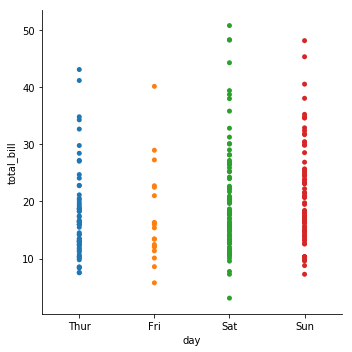

In [8]:
sns.catplot(x='day', y='total_bill', jitter=False, data=df)

### Gráfico "swarm"
Semelhante ao gráfico "strip", este gráfico representa dados numéricos por categoria, diferenciando somente no método de transformação. No lugar do _jitter_, utiliza o método "swarm", que enfatiza a visualização das distribuições de frequência. Para utilizar esse gráfico, definimos o parâmetro ```kind="swarm"```.

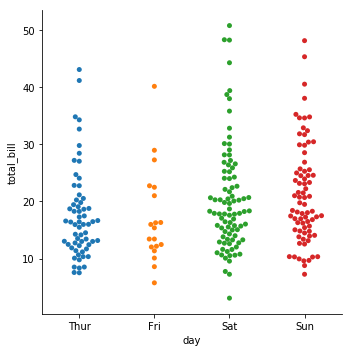

In [9]:
sns.catplot(x='day', y='total_bill', kind='swarm', data=df)

Observando o gráfico, percebemos que a distribuição do valor total das contas está consentrado entre 10 e 20 dólares nas quintas-feiras. Nos finais de semana (principalmente nos domingos), observamos um aumento da dispersão, sugerindo que as pessoas costumam gastar mais nesses dias. 

Temos, ainda, a possibilidade de utilizar dos parâmetros opcionais para aumentar a percepção dos padrão investigados. No exemplo abaixo, utilizamos a escala de cores para diferenciar os horários das refeições. Alé disso, por questões estéticas, invertemos os eixos $x$ e $y$.

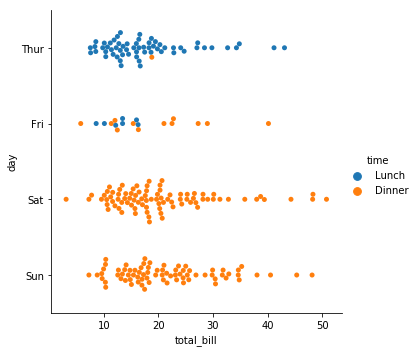

In [10]:
sns.catplot(x='total_bill', y='day', hue='time', kind='swarm', data=df)

Agora, além de identificar a diferença entre as distribuições das contas, percebemos que nas quintas praticamente todos os clientes estão presentes exclusivamente no horário de almoço. Nos finais de semana, entretanto, temos o comportamento oposto.

### Gráfico "box"
O gráfico "box" (mais conhecido na literatura como _boxplot_) é uma alternativa ao gráfico "swarm" para a comparação de distribuições. Nesse caso, temos a representação por meio de quartis.

![](http://www.portalaction.com.br/sites/default/files/resize/EstatisticaBasica/figuras/boxplot1-700x354.png)

No exemplo abaixo temos o gráfico "box" do ```total_bill``` para cada ```day```.

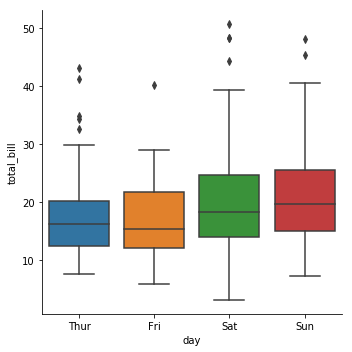

In [11]:
sns.catplot(x='day', y='total_bill', kind='box', data=df)

Com o gráfico "box", confirmamos que os clientes costumam gastar mais nos finais de semana (sobre tudo nos domingos). Abaixo, temos um exemplo com escala de cores para o atributo ```smoker```.

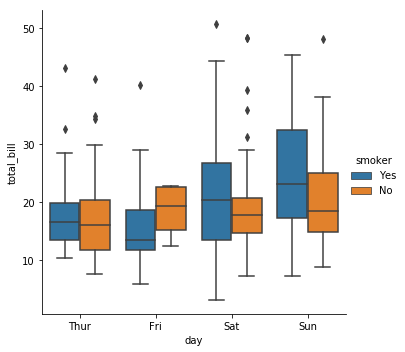

In [12]:
sns.catplot(x='day', y='total_bill', hue='smoker', kind='box', data=df)

### Gráfico "boxen"
Este gráfico é semelhante ao gráfico "box", com a vantagem de mostrar mais quartis, facilitando a análise comparativa de distribuições.

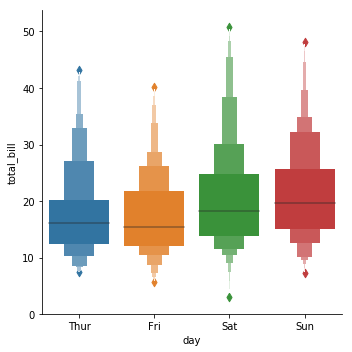

In [13]:
sns.catplot(x='day', y='total_bill', kind='boxen', data=df)

### Gráfico "violin"
O gráfico "violin" possui a mesma idéia final dos gráficos "box" e "boxen". Nesse caso, no lugar dos quartis temos uma aproximação da curva de distribuição de frequência através de um estimador de densidade baseado em _kernel_.

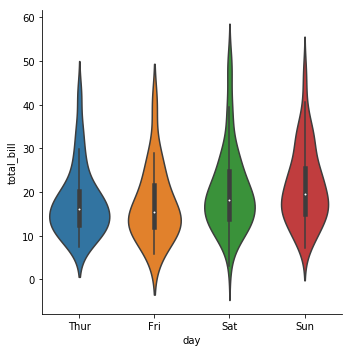

In [30]:
sns.catplot(x='day', y='total_bill', kind='violin', data=df)

O gráfico "violin" é especialmente útil para comparação através de escala de cor. Adicionando o parâmetro ```split=True``` temos uma visualização "espelhada". No exemplo abaixo temos o sexo dos clientes diferenciados em escala de cor.

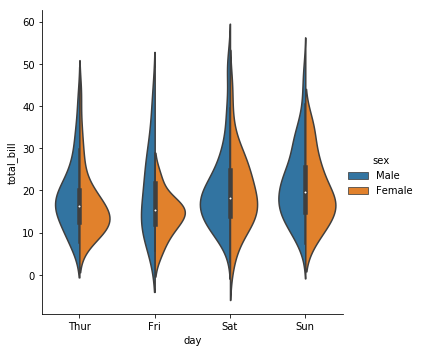

In [28]:
sns.catplot(x='day', y='total_bill', hue='sex', kind='violin',split=True, data=df)

Observando o gráfico percebemos que nos sábados, por exemplo, a média das contas dos homens e mulheres é igual com uma dispersão maior para as mulheres.

### Gráfico "bar"
O gráfico "bar" representa uma estimativa da tendência central (i.e. a média) para uma coluna numérica com a altura de cada retângulo e fornece, ainda, uma indicação a incerteza ao redor da estimativa através dos traços verticais.

No exemplo abaixo temos a estatística para o tamanho das refeições (```size```) em relação aos dias das semanas (eixo $x$) e o horário das refeições (```time```).

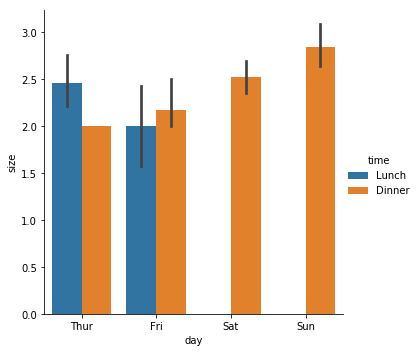

In [16]:
sns.catplot(x='day', y='size', hue='time', kind='bar', data=df)

Lembrando que temos sempre a possibilidade de utilizar os parâmetros opcionais: ```hue```, ```row``` e ```col```. (Os parâmetros ```size``` e ```style``` não fazem parte do conjunto de parâmetro dos gráficos ```seaborn.catplot()```). 

Abaixo, temos um exemplo com o sexo separado por coluna de gráficos.

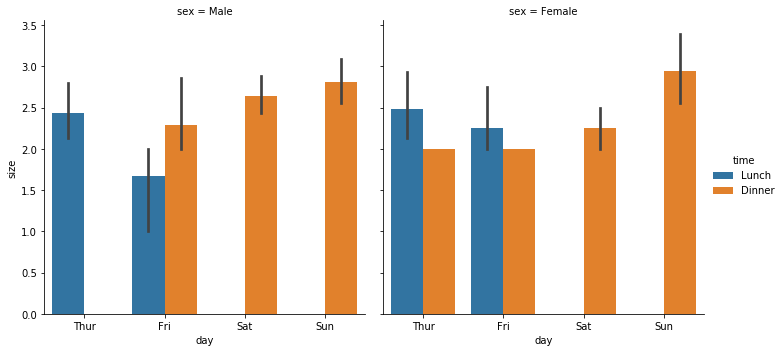

In [17]:
sns.catplot(x='day', y='size', hue='time', col='sex', kind='bar', data=df)

### Gráfico "count"
Por fim, temos o gráfico que analisa a frequência de dados categóricos através da definição do parâmetro ```kind='count'```. No exemplo abaixo, temos o número de clientes por dia e horário. 

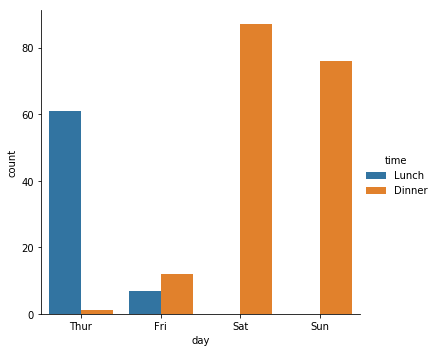

In [18]:
sns.catplot(x='day', hue='time', kind='count', data=df)

## Gráficos para análise de distribuição de dados
Em análise de dados, geralmente a primeira coisa que estamos interessados em descobrir é a forma como as variáveis são distribuidas. Nesse conjunto de gráficos, temos a possibilidade de examinar distribuições univariadas e bivariadas.

### Gráfico ```distplot```
O comando [```seaborn.distplot()```](https://seaborn.pydata.org/generated/seaborn.distplot.html#seaborn.distplot) gera uma estimativa da distribuição de dados a partir de uma ```Series```do pandas. No exemplo abaixo, geramos a estimativa da distribuição de frequência para a coluna ```tip```.

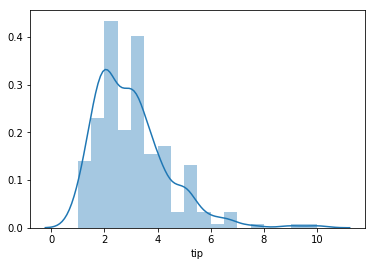

In [19]:
sns.distplot(df.tip)

Utilizando o comando [```seaborn.kdeplot()```](https://seaborn.pydata.org/generated/seaborn.kdeplot.html#seaborn.kdeplot) temos o mesmo gráfico sem o histograma. Definido o parâmetro ```shade=True```, acrescentamos um sobreado abaixo da curva

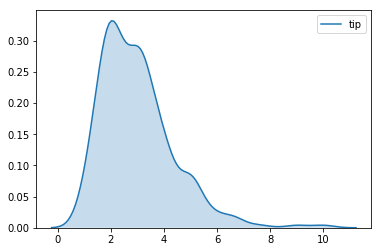

In [20]:
sns.kdeplot(df.tip, shade=True)

## Gráfico ```joinplot```
Utilizando o comando [```seaborn.jointplot()```](https://seaborn.pydata.org/generated/seaborn.jointplot.html) geramos gráficos para análise bivariada. Essa função possui, como padrão, o valor do parâmetro ```kind='scatter'```. No exemplo abaixo temos a comparação entre o ```total_bill``` e a ```tip```. 

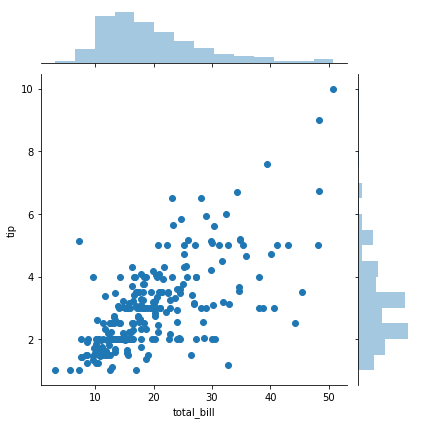

In [21]:
sns.jointplot(x='total_bill', y='tip', data=df)

Definindo o parâmetro ```kind='hexa'``` temos a mesma representação do gráfico anterior com o uso do gráfico de hexágonos no lugar do _scatter_, dando maior noção da concentração dos pontos.

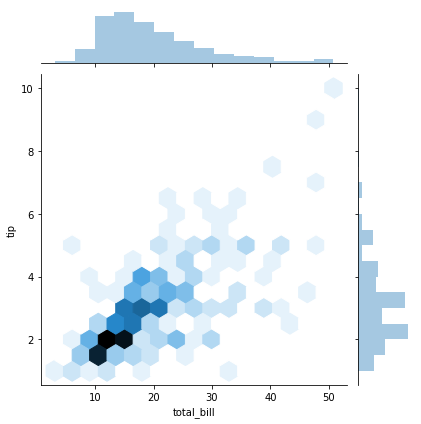

In [22]:
sns.jointplot(x='total_bill', y='tip', kind='hexa', data=df)

Com ```kind='kde'```, temos a visualização com a estimativa de distribuição bivariada.

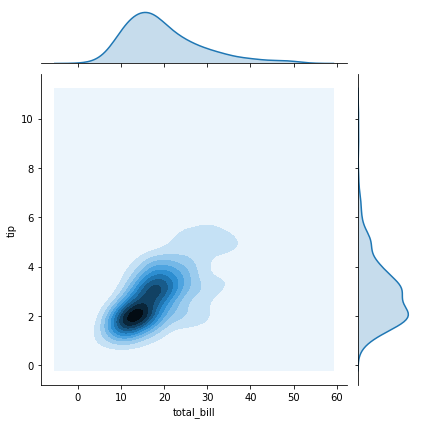

In [23]:
sns.jointplot(x='total_bill', y='tip', kind='kde', data=df)

### Gráfico ```pairplot```
Por fim, temos a possibilidade de, em um comando, plotar a comparação bivariada entre todas as combinação de colunas numéricas. Para tando, utilizamos o comando [```seaborn.pairplot()```](https://seaborn.pydata.org/generated/seaborn.pairplot.html). O resultado é uma matriz de gráficos de dispersão (valor padrão de ```kind='scatter'```), com a diagonal principal representada pelo histograma da variável em questão.

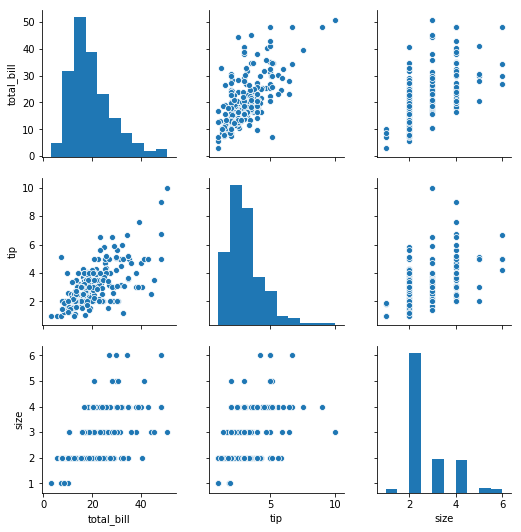

In [24]:
sns.pairplot(data=df)

Definindo o parâmetro ```kind='reg'```, temos o mesmo _output_ acrescido das retas de regressão.

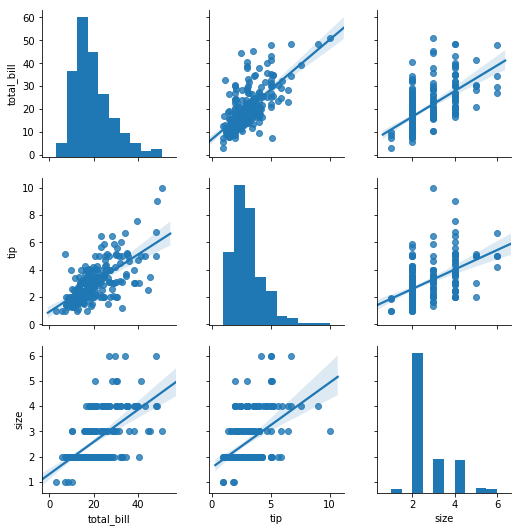

In [25]:
sns.pairplot(kind='reg', data=df)

Por fim, temos a possibilidade de definir o parâmetro ```hue``` para uma coluna categórica. No exemplo abaixo, utilizamos a coluna ```time```.

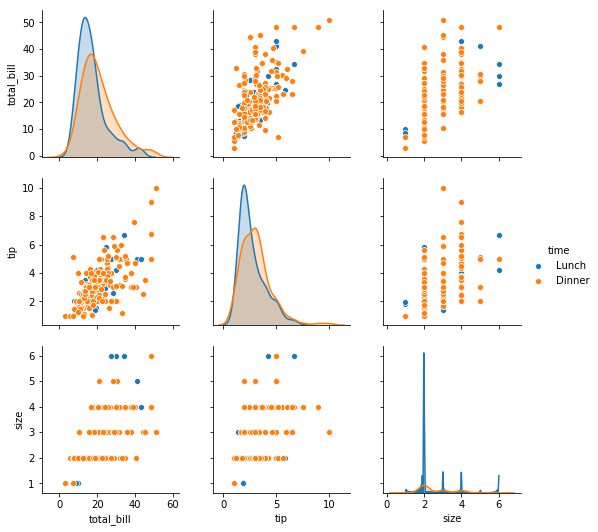

In [26]:
sns.pairplot(hue='time', data=df)